In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [9]:
df.Cabin.unique()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [14]:
for col in df.columns:
  if df[col].unique().shape[0] < 10:
    print(col,df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


In [15]:
for col in df.columns:
  if df[col].nunique() > 10:
    print(col,df[col].nunique())

PassengerId 891
Name 891
Age 88
Ticket 681
Fare 248
Cabin 147


In [18]:
df.drop(columns=['Cabin'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [36]:
df = df.sort_values(by="Ticket").fillna(method='ffill')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 504 to 745
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 504 to 745
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.528159,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.350073,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.describe(include="O")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Crosby, Capt. Edward Gifford",male,1601,S
freq,1,577,7,646


In [44]:
for col in df.columns:
  if df[col].nunique() < 10:
    print(df[col].value_counts(),"\n")

Survived
0    549
1    342
Name: count, dtype: int64 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex
male      577
female    314
Name: count, dtype: int64 

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 

Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64 

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64 



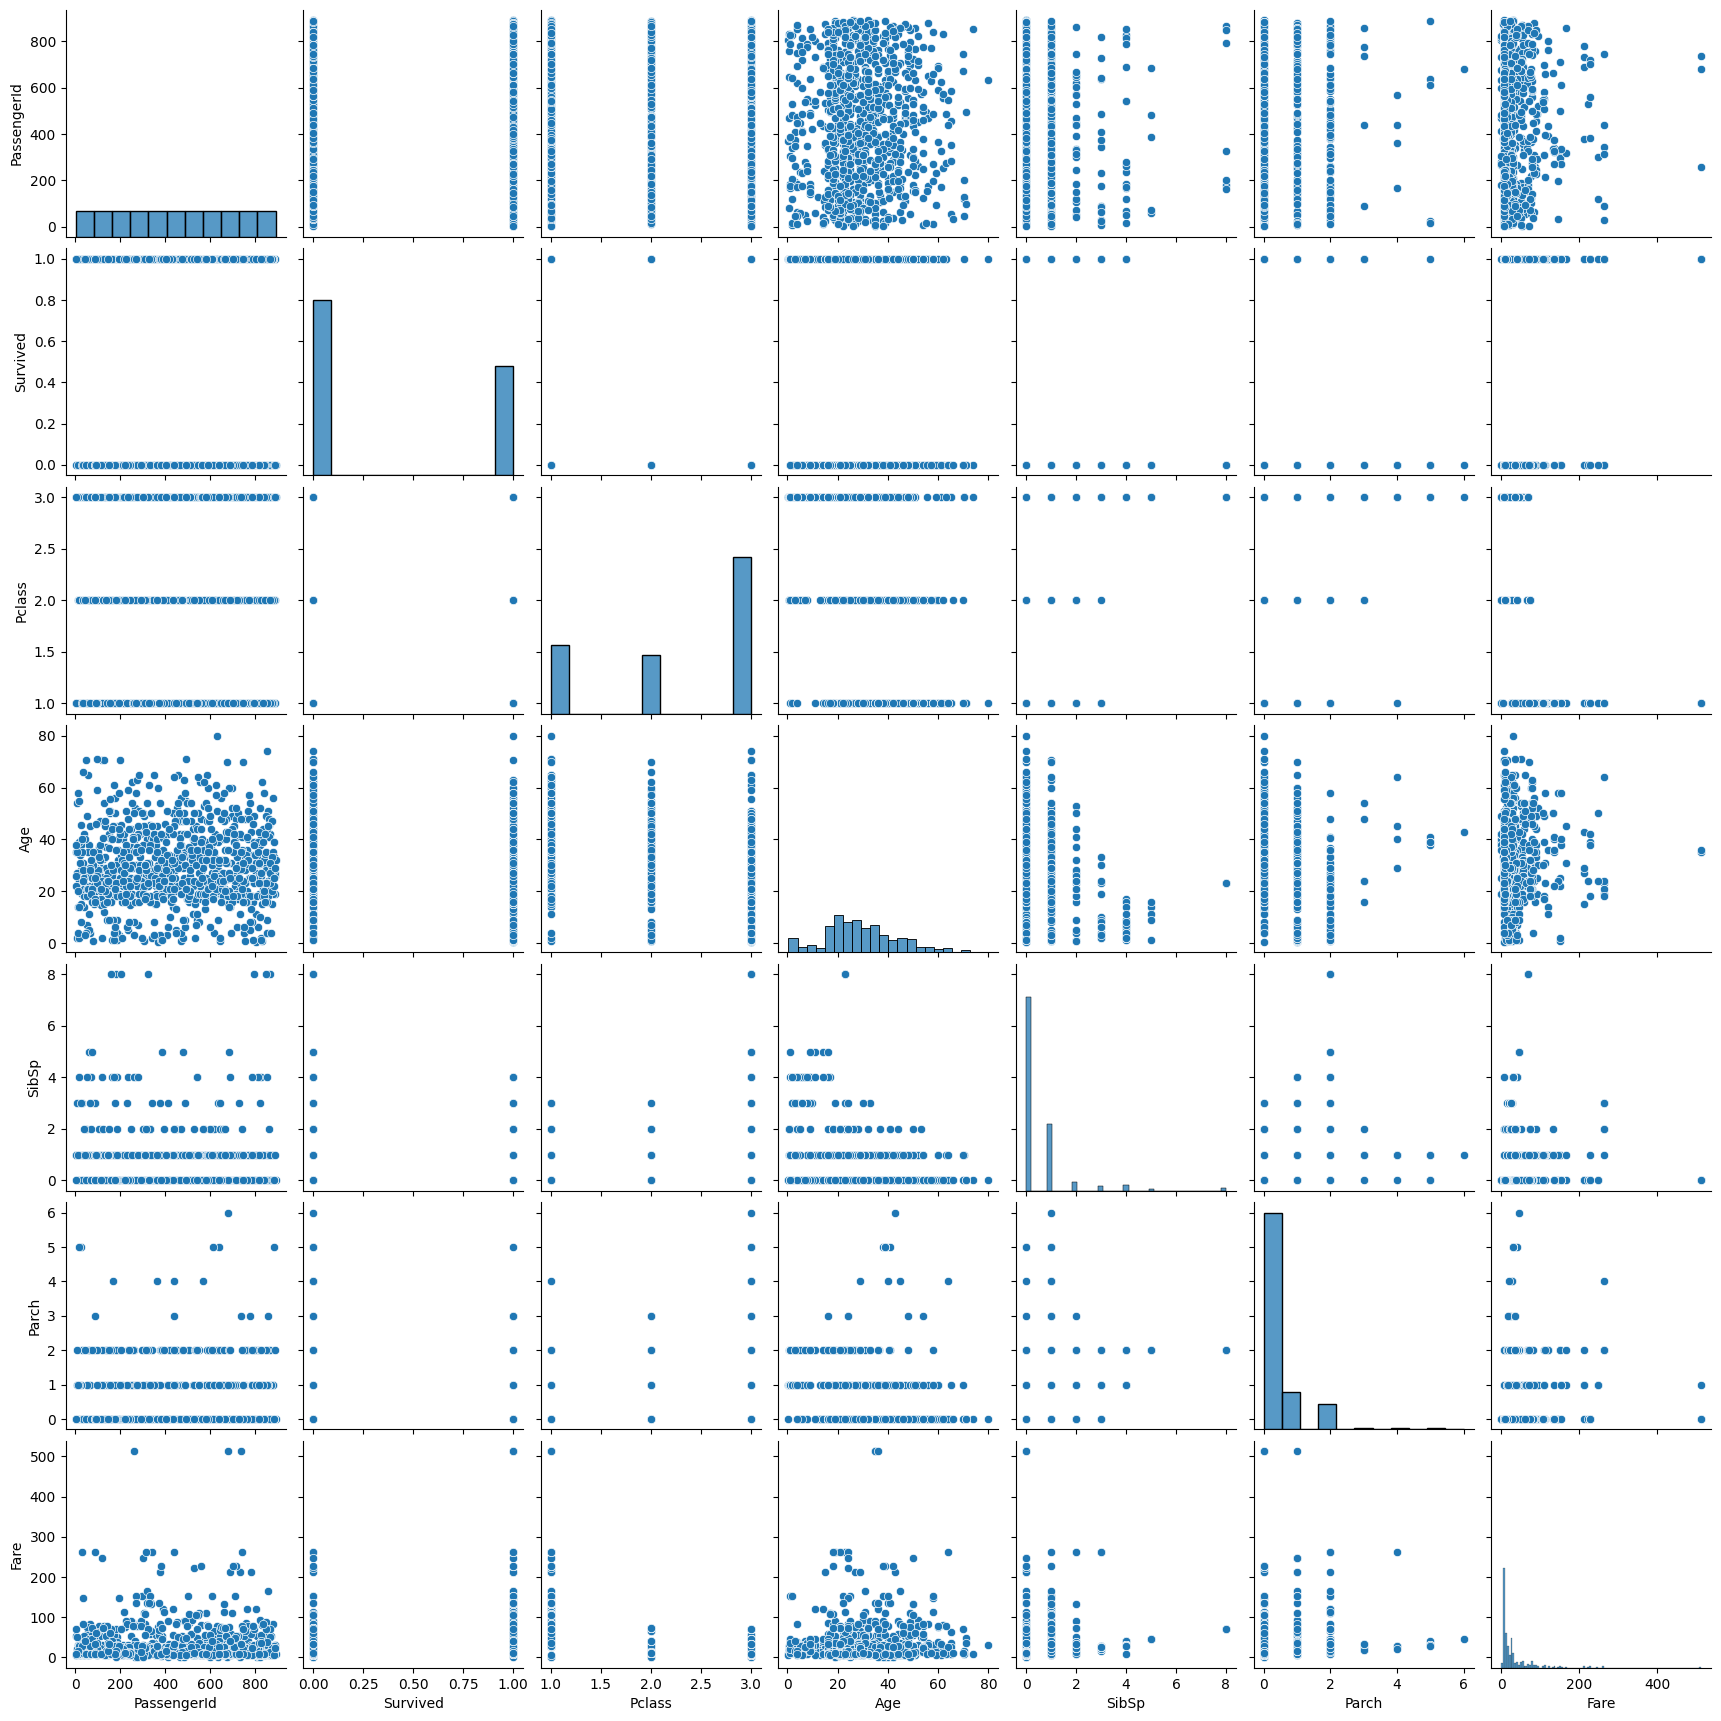

In [45]:
sns.pairplot(df)

This pairplot gives an overview of the relationships between numerical variables. No strong linear trends are immediately visible, but class separation and survival distributions can be inferred from clusters.


<Axes: >

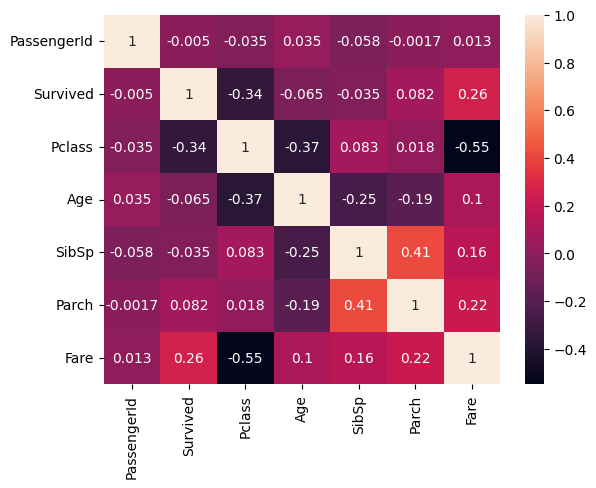

In [49]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True)

the chances of survival in Pclass increases with 1st class

the higher the age the better class they travel in

sibling/spouses and parent child are related

the more you pay the better class you get hence increasing chances of survival


<Axes: xlabel='Pclass'>

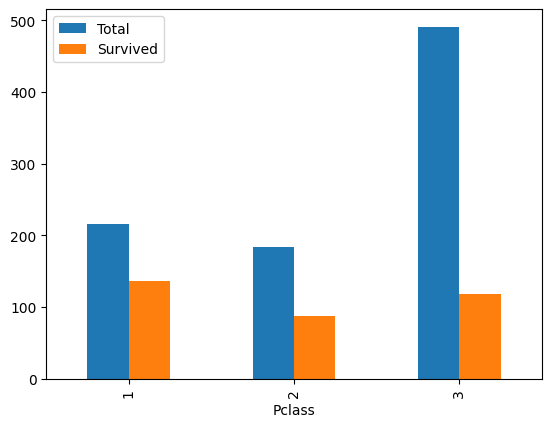

In [62]:
df.groupby("Pclass")["Survived"].agg(Total="count", Survived="sum").plot(kind="bar")


[]

<Figure size 1000x500 with 0 Axes>

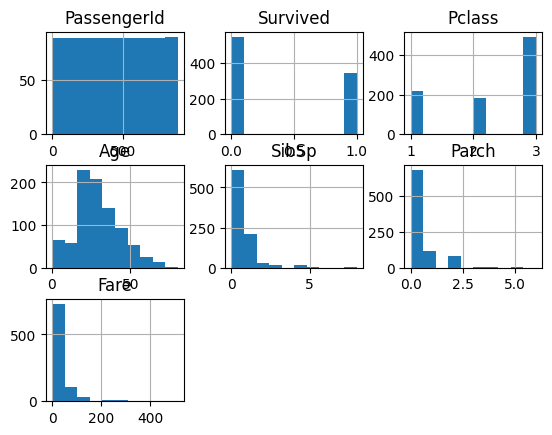

In [64]:
plt.figure(figsize=(10,5))
df.hist()
plt.plot()

The histograms provide distribution insights:

Age is right-skewed with many passengers below 40.

Fare is highly right-skewed.

Survived and Pclass are categorical in nature.

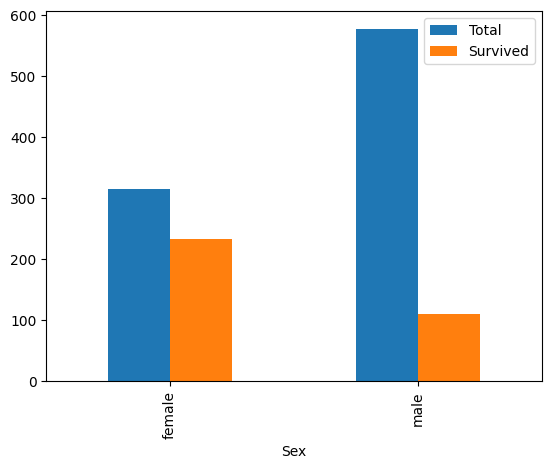

In [89]:
df.groupby("Sex")["Survived"].agg(Total="count", Survived="sum").plot(kind="bar")
plt.show()

The bar chart shows that females had a significantly higher survival count compared to males, despite lower total count, suggesting gender influenced survival.

In [67]:
df["Minor"] = np.where(df.Age<18,1,0)

[]

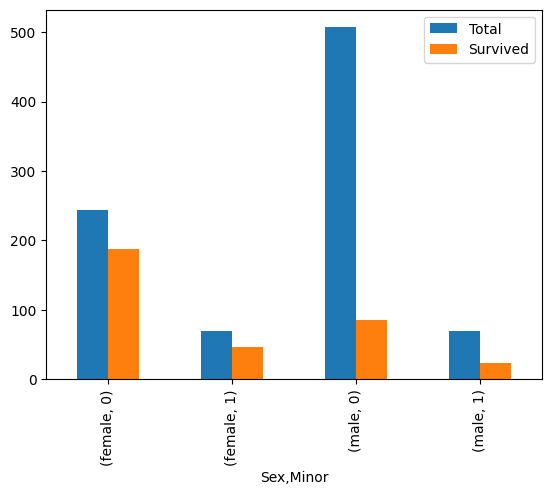

In [75]:
df.groupby(["Sex","Minor"])["Survived"].agg(Total="count", Survived="sum").plot(kind="bar")
plt.plot()


This visualization highlights survival across both gender and whether the passenger was a minor. It appears that female minors had higher survival rates, aligning with the "women and children first" policy.

[]

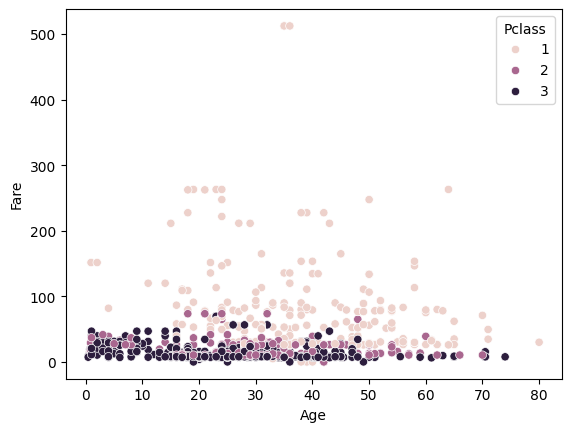

In [80]:
sns.scatterplot(data=df,x="Age",y="Fare",hue="Pclass")
plt.plot()

The scatterplot shows that younger passengers are spread across all fare ranges, while older passengers tend to be clustered in the mid to low fare regions. Higher fares are generally associated with Pclass 1.

[]

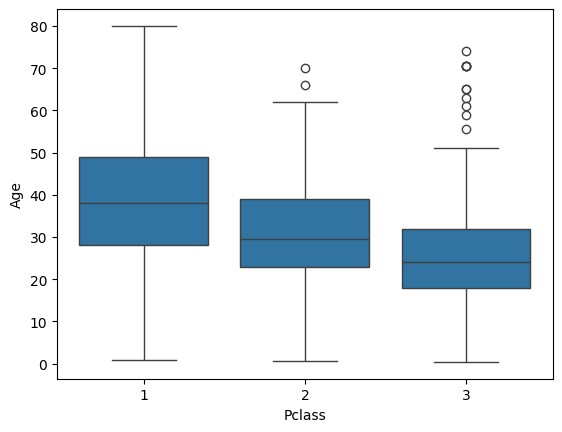

In [81]:
sns.boxplot(data=df,x="Pclass",y="Age")
plt.plot()

Passengers in Pclass 1 had a higher median age.

Pclass 3 includes many young passengers, suggesting more children or younger individuals in lower class.

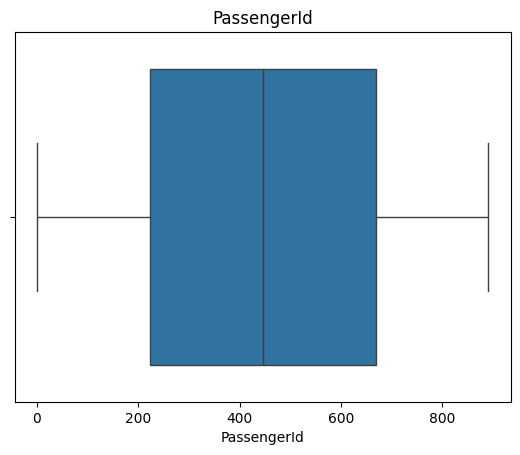

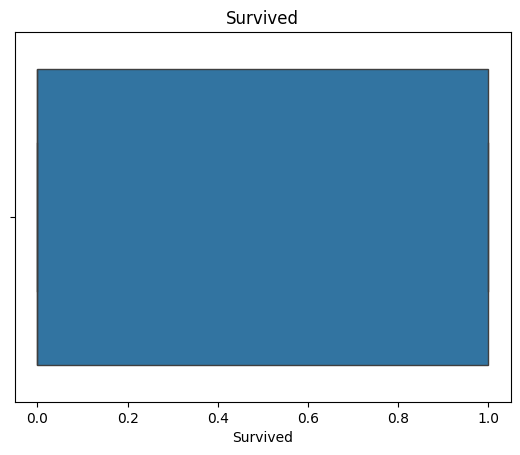

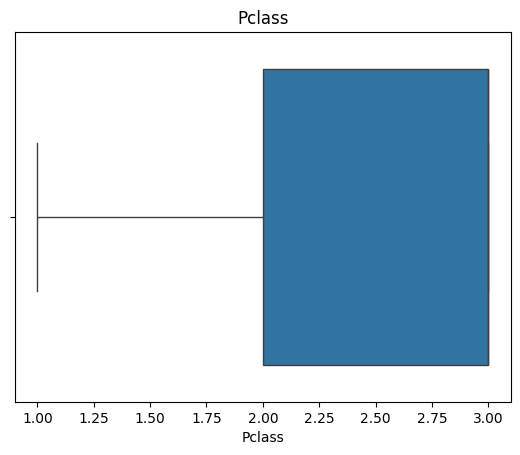

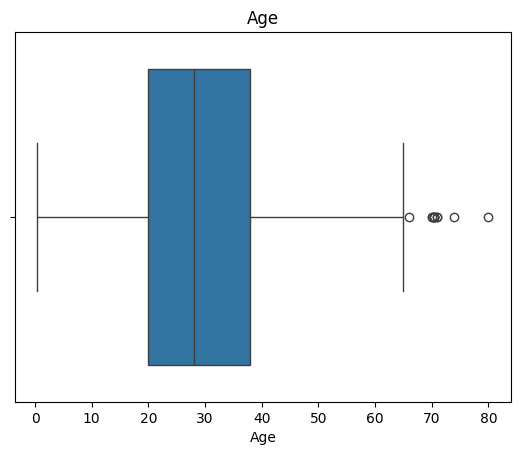

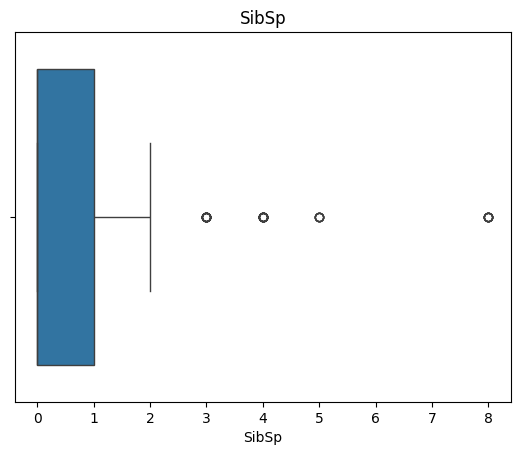

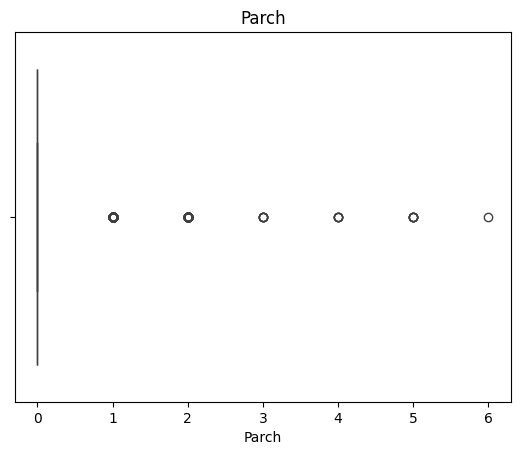

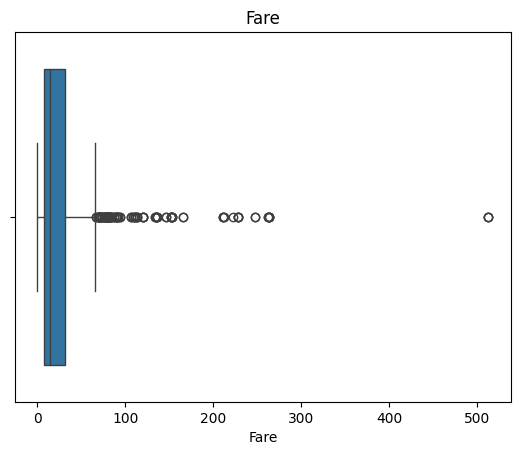

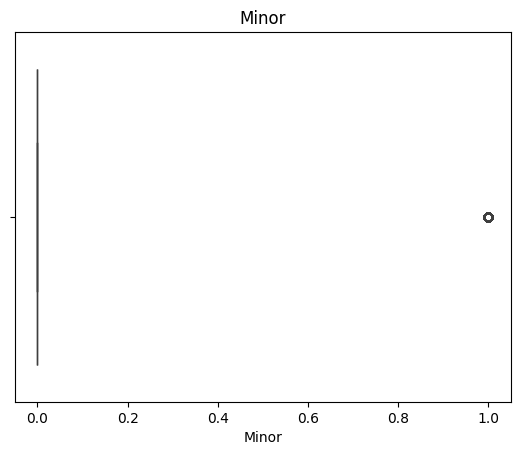

In [90]:
for col in df.select_dtypes("number"):
  sns.boxplot(data=df,x=col)
  plt.title(col)
  plt.show()